In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Wholesale.csv")
df # These are monthly expenses for each product

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
df.describe()
# check outliers looking at max: almost in all columns outliers are present at upper extreme

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: >

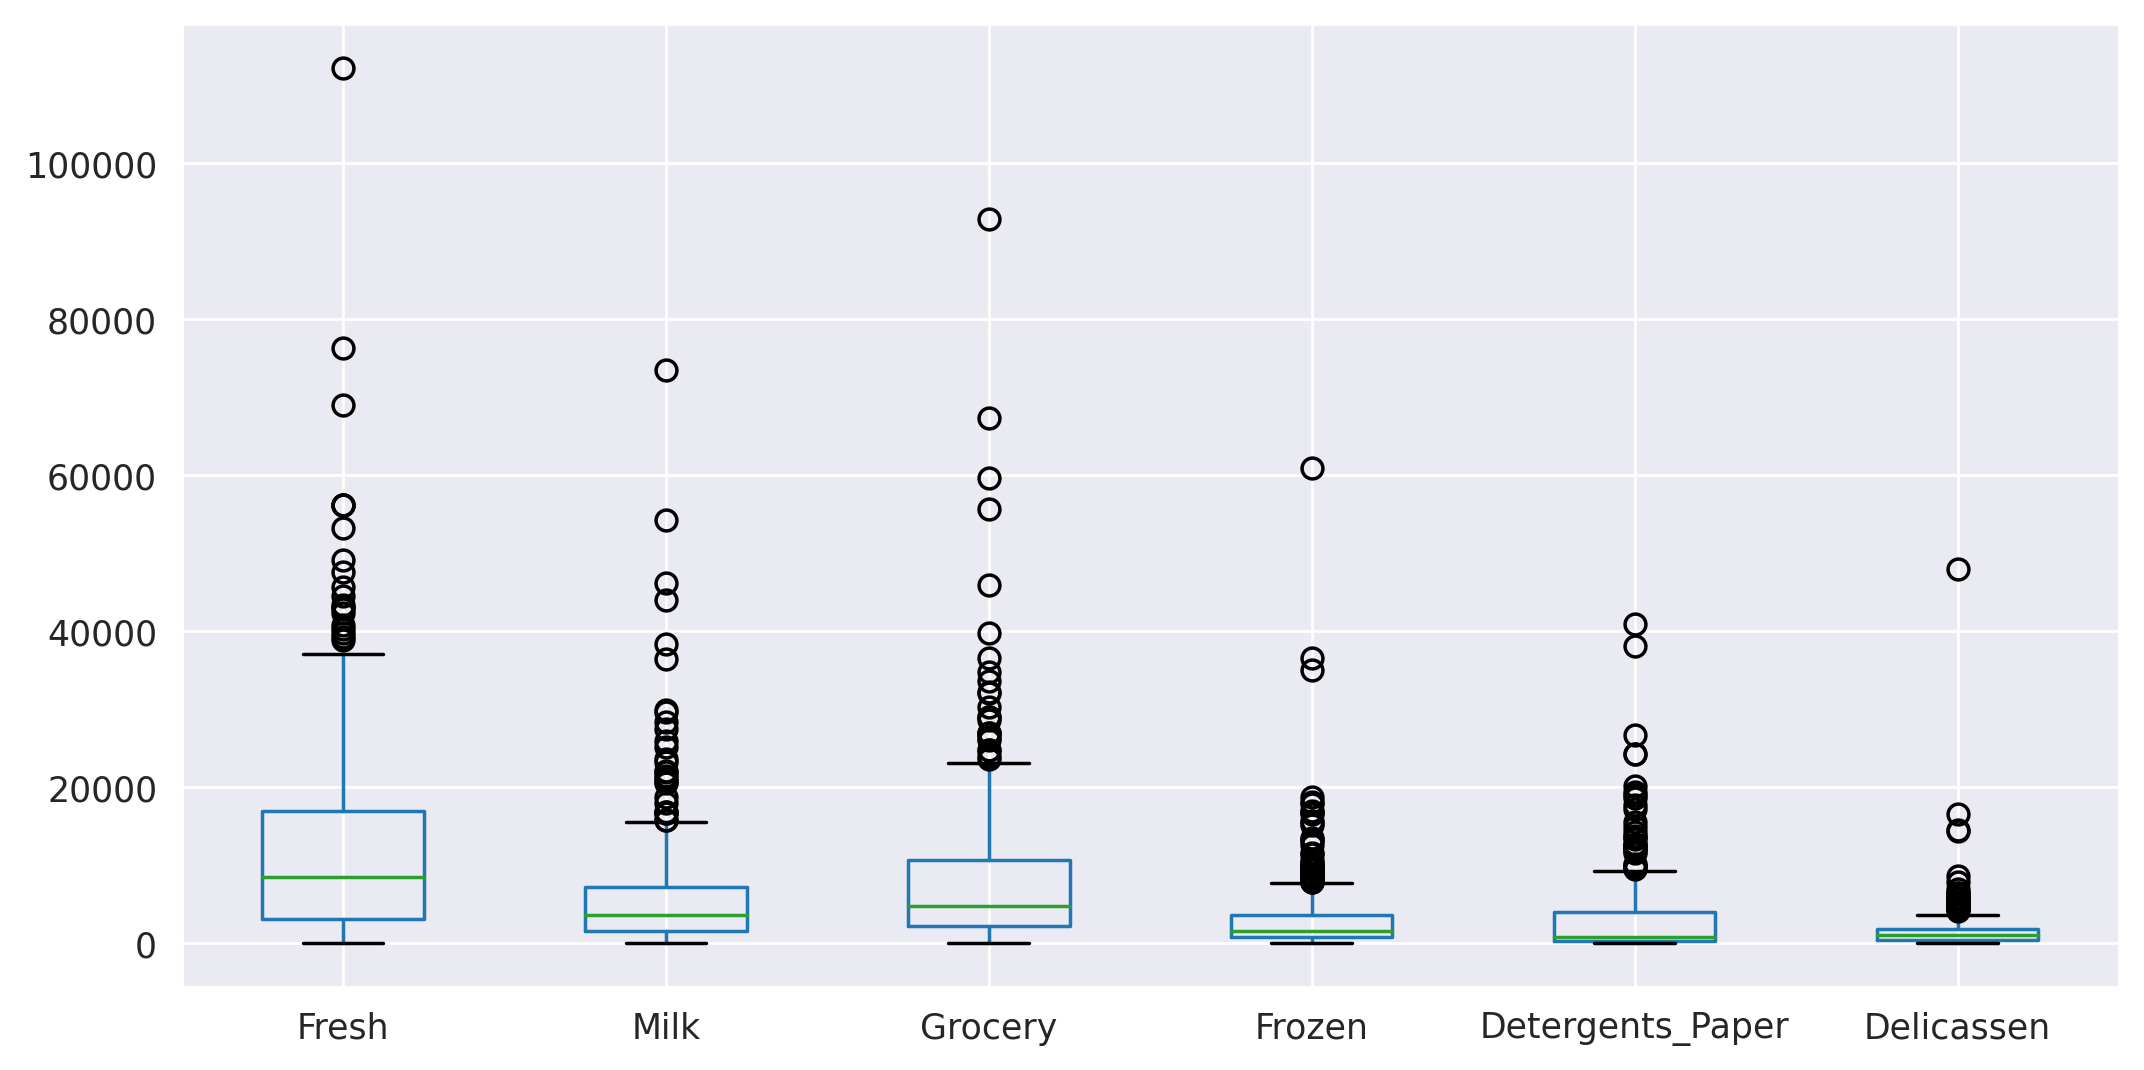

In [ ]:
# compare outliers with boxplot
df.boxplot() # all columns have huge amount of outliers

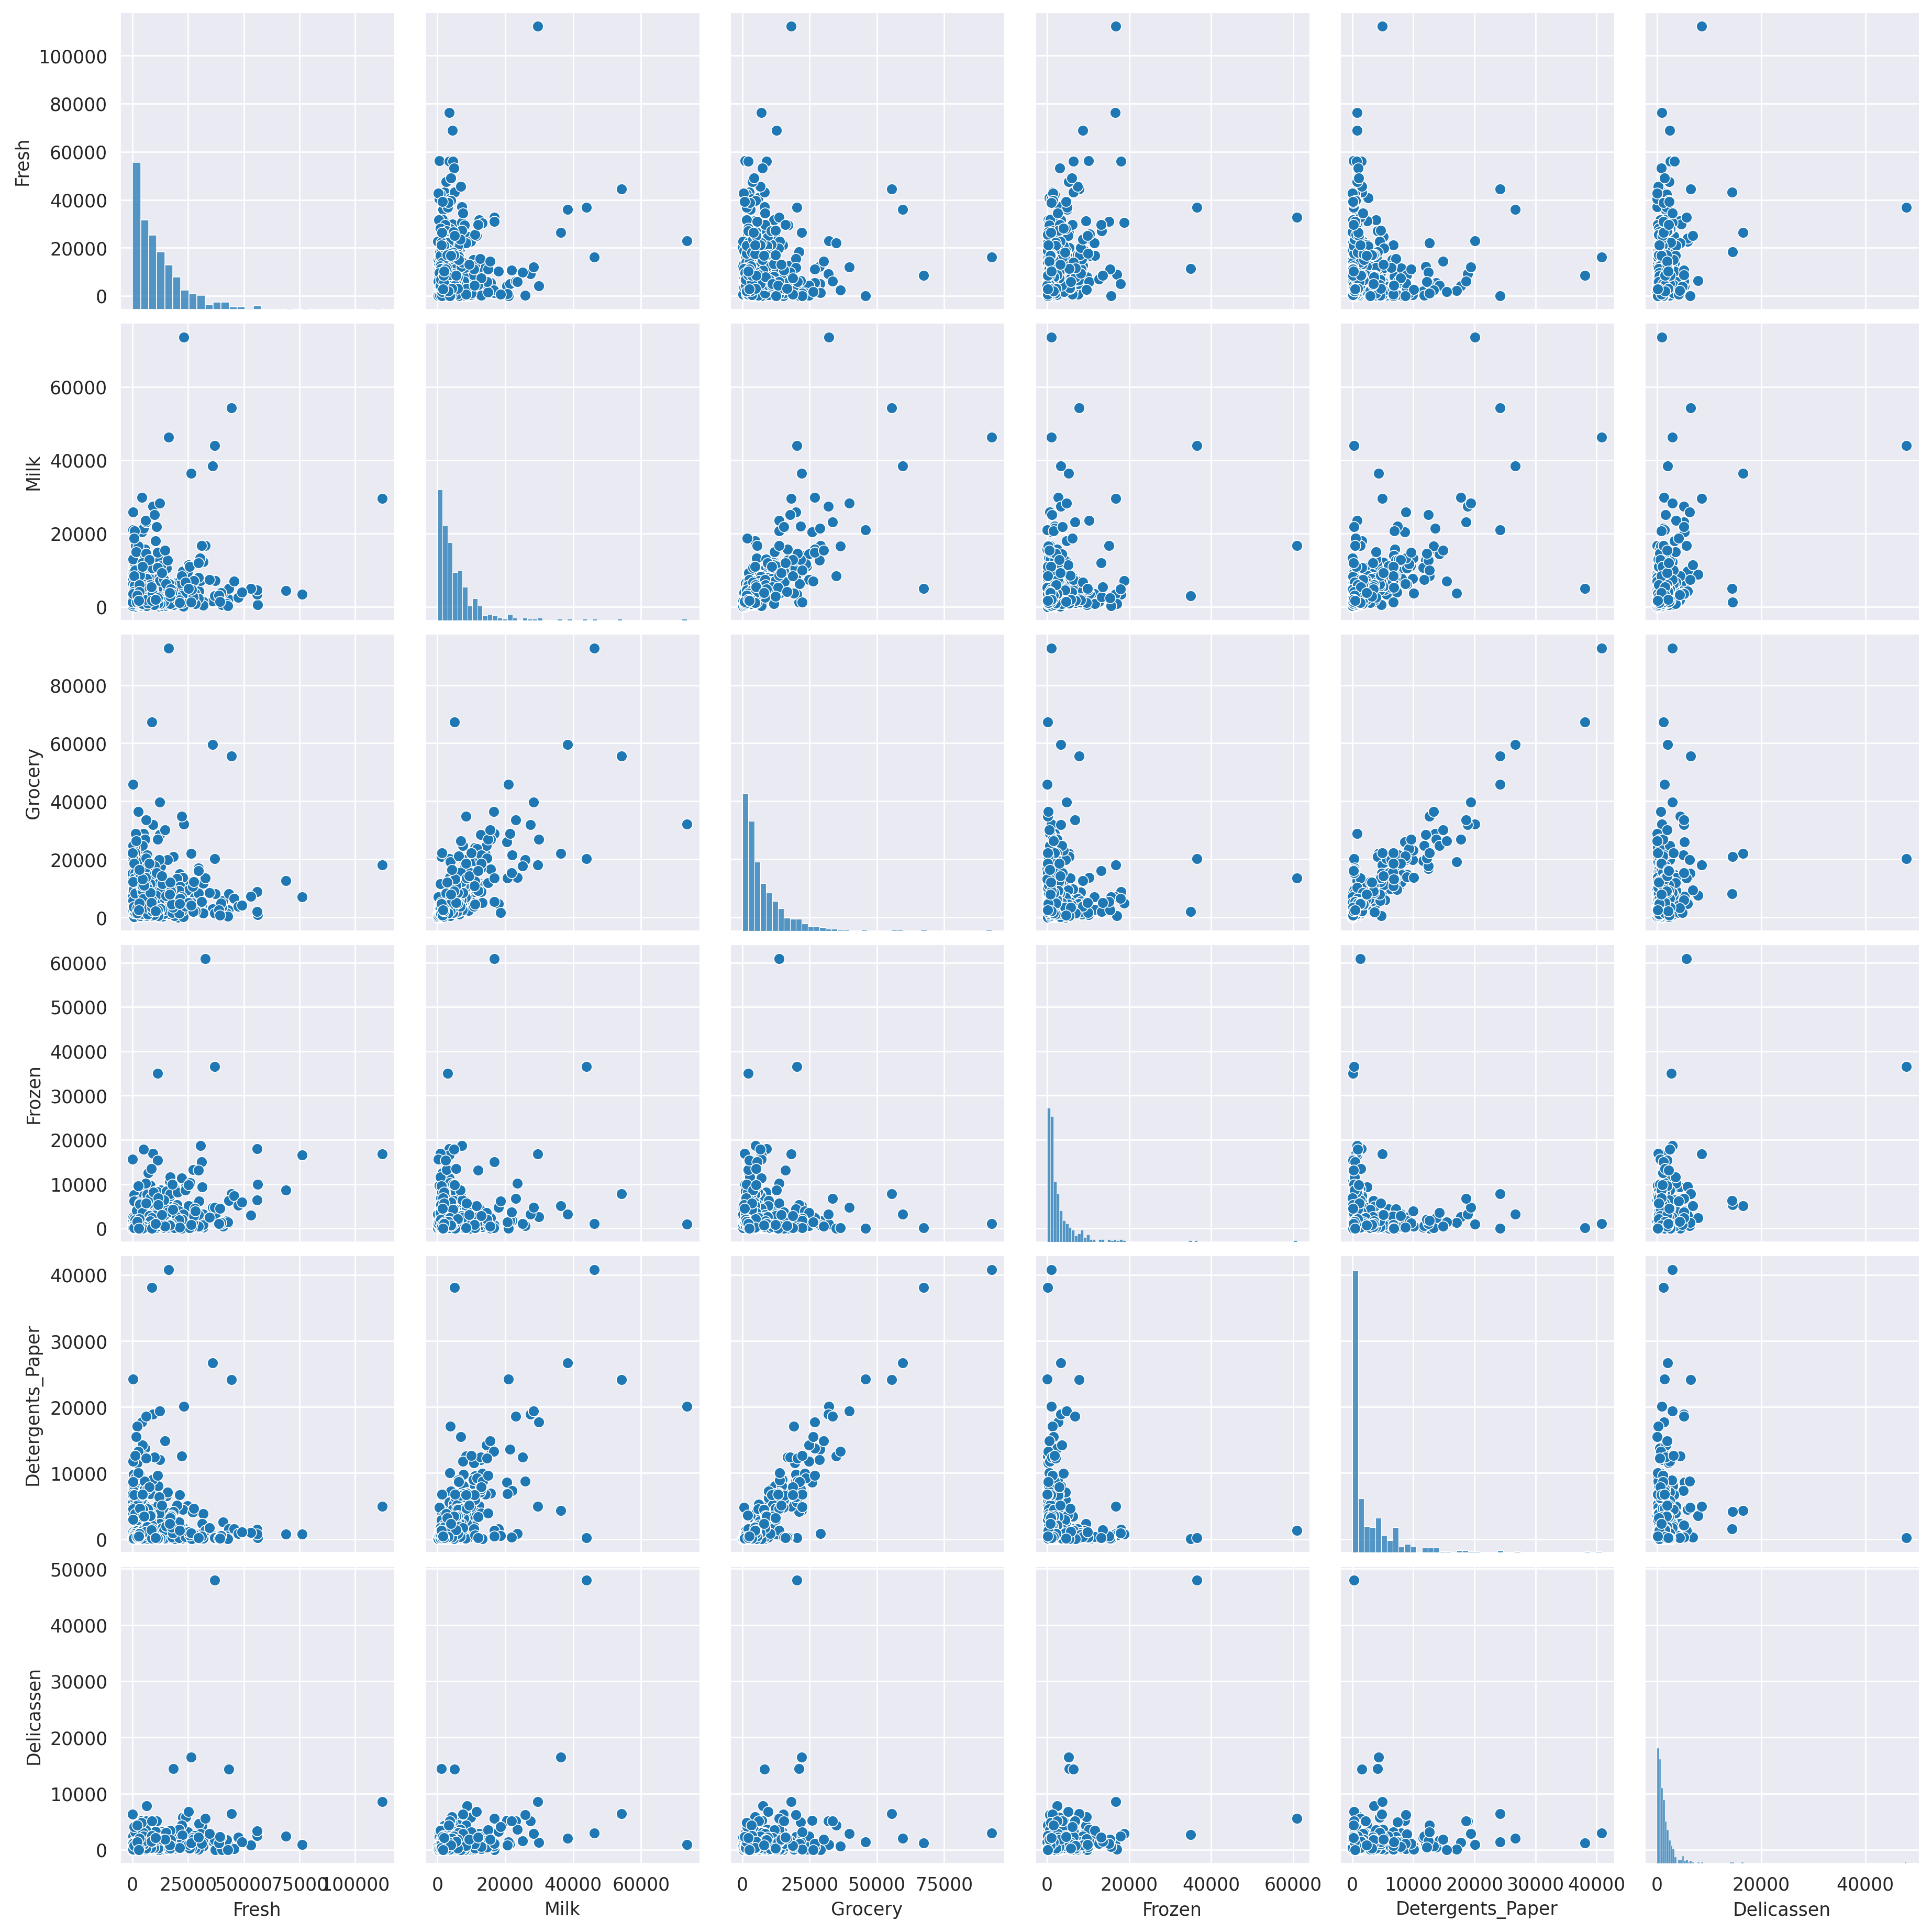

In [ ]:
# Let us have an idea of no. of clusters with pairplot
sns.pairplot(df)
# there is only 1 cluster with outliers but we can't fully rely on scatterplot

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(df)
x

# **Model Building**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.5, min_samples=3) # default eps=0.5
y = db.fit_predict(x)
y
# unique nos: -1,0,1,2,3,4,5
# -1:outliers, 0 to 5: 6 clusters are there.
# Max data points are outliers as eps is not appropriate i.e. it's very small so it is showing many outliers
# If you change eps and min_samples it will directly impact accuracy of model so they are Hyperparameters which must by tuned.

In [ ]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

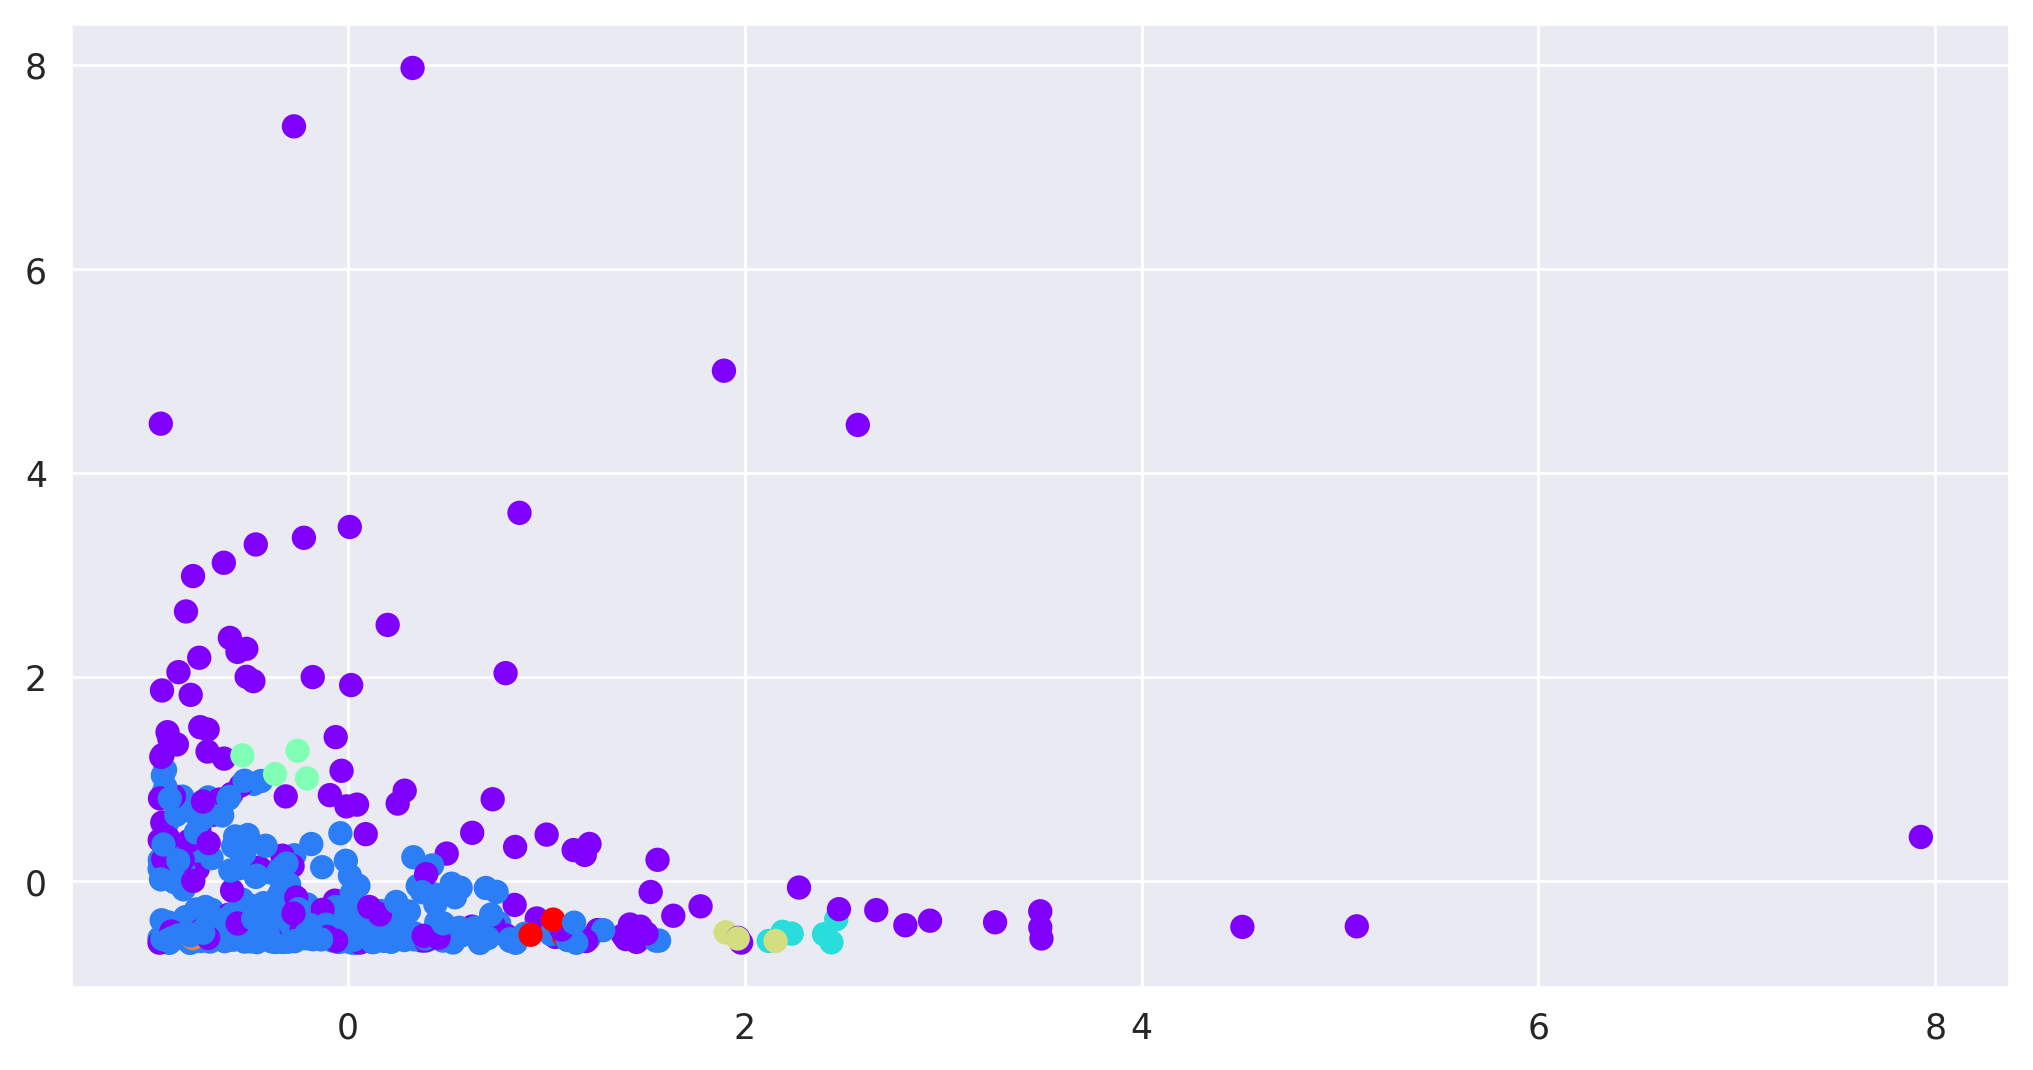

In [ ]:
plt.scatter(x[:,0],x[:,4],c=y,cmap='rainbow')
# c=y i.e. give color coding to each data point depending upon which cluster it belong to
# In y we have cluster no for each data point and outlier information if it is -1
# plot of any 2 columns from x i.e. index 0 and 4 column
# clusters are overlapping, purple data points are far away so they are outliers. So not a goo model
# Confirm it with silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(x,y) # parameters: x:standardized version of data, y:cluster lables
# score is approximately equal or near to zero i.e. clusters are overlapping

-0.07329671681468523

# **Hyperparameter Tuning**

**Selecting Min_samples or MinPts:**

1.   Number of columns + 1: 6+1=7
2.   Number of columns * 2: 6*2=12
3.   Always keep min_samples at least 3





# **Find best eps value (K-dist Plot)**

*   This technique calculates the average distance between each point and its k nearest neighbours where k is the MinPts value you selected.
*   Similar to elbow graph: On x-axis: distance, y-axis:eps, let's say min_samp: 3. It will draw circles of eps size around each data point. Then avg distance of all data points which belong to same clster will be calculated. If eps is high, avg distance will also be very high.
*   Then another eps value will be taken and process is repeated, avg. distance will be calculated. This will be done for more than 100 times. Opposite to elbow graph, graph will be plotted -/ (At joint level is the elbow, check drastic decrease.)
*   The average k-distances are then plotted in ascending order on a k-distance graph. You will find the optimal value foe eps at the point of maximum curvature (i.e. where the graph has the greatest slope).



In [ ]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point

In [ ]:
neighbor = NearestNeighbors(n_neighbors=3).fit(x) # fit will calculate distance using euclidean distance method
# n_neighbors:min sample. Calculate nearest 3 data points of each data point
# eps values will be selected randomly by algorithm

In [ ]:
# distances (calculated with eps value) are stored in neighbor
d,index = neighbor.kneighbors(x)
# kneighbors() will show distances.
# It returns 2 values, d:euclidean distances: 3 distances are there in every list as we have selected min sample as 3
# row index: which data point is close to which other data point

In [ ]:
neighbor.kneighbors(x)
# in d: [0.        , 0.46098501, 0.49746796]
# 1st column value: 0 represents distance of 1st nearest neighbor
# 2nd col. value: 0.46098501 represents distance of 2nd nearest neighbor
# 3rd col value: 0.49746796 represents distance of 3rd nearest neighbor
# in 1st col everywhere distance is 0 because it's the distance between x and itself so ignore 1st column

# Index: [  0,   5, 281]
# row 0 and 5 are close to each other
# distance between row 0 and row 0 is 0,
# between row 0 and row 5 is 0.46098501, between row 0 and row 281 is 0.49746796 and so on

# So row 0 and 5 are closest to each other
# row 1 and 244 are closest to each other
# row 2 and 218 are closest to each other and so on

In [ ]:
d

In [ ]:
index

In [ ]:
d[:,1]

In [ ]:
distance = np.sort(d[:,1]) # consider all rows and 1st nearest neighbor values i.e.2nd column

In [ ]:
distance

In [ ]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color='red') # y=2 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

# **Model Evaluation**

In [ ]:
db = DBSCAN(eps=2,min_samples=3) # consider eps=2, try min_samples as 7 or 13 by rule 2 and 3 and check silhouette score
yp = db.fit_predict(x)
yp
# outliers are reduced, Max clusters:1 i.e. only one cluster: cluster 0

In [ ]:
plt.scatter(x[:,1],x[:,2],c=yp,cmap='viridis') # try cmap=rainbow
# purple data points are outliers

In [ ]:
silhouette_score(x,yp) # good score

0.7486988127438182

In [ ]:
# Analyze the clusters
df['Cluster'] = yp
df

In [ ]:
df[df['Cluster'] == -1]

In [ ]:
df[df['Cluster'] == -1].shape[0]

13

In [ ]:
df['Cluster'].value_counts()

 0    427
-1     13
Name: Cluster, dtype: int64

In [ ]:
# extract only normal data points
data = df[df['Cluster']==0]
data

In [ ]:
df.groupby('Cluster').agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
-1,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398
